In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt

%matplotlib inline

### 导入数据

In [2]:
df = pd.read_excel('刷单鉴定评价数据.xlsx')
df.head()

,产品ID,价格,总销量,总评价数,规格类型
0,59497802,189.0,22153,12269,套装
1,55594403,95.0,227064,53842,NaN
2,56419172,79.0,733418,130106,正常规格
3,58567235,89.0,480040,103975,常规单品
4,53625235,59.0,253606,49611,常规单品


### 计算评销比

In [3]:
df['评销比'] = df['总评价数'] / df['总销量'] * 100
df.head()

,产品ID,价格,总销量,总评价数,规格类型,评销比
0,59497802,189.0,22153,12269,套装,55.383018
1,55594403,95.0,227064,53842,NaN,23.712257
2,56419172,79.0,733418,130106,正常规格,17.739679
3,58567235,89.0,480040,103975,常规单品,21.659653
4,53625235,59.0,253606,49611,常规单品,19.562234


### 查看评销比分布

C:\acor\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,0,'评销比')

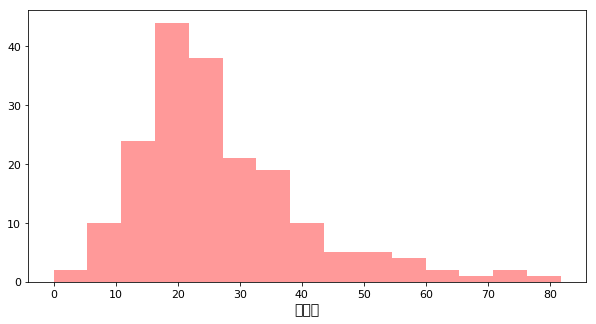

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

fig,ax = plt.subplots(1,1,figsize = (10,5))
sns.distplot(df['评销比'],color = 'red',kde = False)

plt.yticks(fontsize=11)
plt.xticks(fontsize=11)

ax.set_xlabel('评销比', fontsize=14)

### 判断是否有刷单嫌疑

In [5]:
df['是否有刷单嫌疑'] = df['评销比'] > 40
df['是否有刷单嫌疑'].head()

0     True
1    False
2    False
3    False
4    False
Name: 是否有刷单嫌疑, dtype: bool

In [6]:
df['是否有刷单嫌疑'].value_counts()

False    166
True      22
Name: 是否有刷单嫌疑, dtype: int64

### 导入评论数据

In [7]:
comments = pd.read_excel('生姜防脱洗发水.xlsx')
comments.head()

,买家,初评内容,评价日期,追评
0,摈**唉,昨天晚上用了一次， 姜味很浓，用过一段时间再看看效果吧，好用会再回购的！,2019-11-29,-
1,t**4,最近脱发特别严重，鬓角的头发最是损失惨重，抱着试试看的态度来的，目前我用了1个疗程感觉恢复得...,2019-11-29,-
2,露**发,最近头发大把大把的脱，特别是洗头的时候！刚开始是抱着试试的心态，每次都会隔断时间拍照自己对比...,2019-11-29,-
3,t**6,质量很好，效果不错,2019-11-29,-
4,去**5,这次放假回家看到老爸的大脑门，莫名的揪心，老爸为家庭操心了太多，头发一直在掉，这次买了这款防...,2019-11-29,-


### 评价长度筛选

In [8]:
comments['评价长度'] = comments['初评内容'].apply(len)
comments = comments.loc[comments['评价长度'] > 15,:]
print(comments.shape)
comments.head()

(1200, 5)


,买家,初评内容,评价日期,追评,评价长度
0,摈**唉,昨天晚上用了一次， 姜味很浓，用过一段时间再看看效果吧，好用会再回购的！,2019-11-29,-,36
1,t**4,最近脱发特别严重，鬓角的头发最是损失惨重，抱着试试看的态度来的，目前我用了1个疗程感觉恢复得...,2019-11-29,-,80
2,露**发,最近头发大把大把的脱，特别是洗头的时候！刚开始是抱着试试的心态，每次都会隔断时间拍照自己对比...,2019-11-29,-,85
4,去**5,这次放假回家看到老爸的大脑门，莫名的揪心，老爸为家庭操心了太多，头发一直在掉，这次买了这款防...,2019-11-29,-,76
5,德**艺,以前就用过这款生姜洗发水防脱发效果真的很好，这次这个疗程是买来巩固的用过之后脱发已经很少了，...,2019-11-29,-,60


### 按内容排序，找到嫌疑评价

In [9]:
comments = comments.sort_values(['评价长度','初评内容'],ascending = False)
comments.head(6)

,买家,初评内容,评价日期,追评,评价长度
1307,你**个,感觉越洗头发掉得越多，每次洗必须要用洗发水两次以上，还要搓按5分钟，这样洗下去头发本来就少，...,2019-07-11,我是短发，洗一次掉这么多，以前洗只掉几根，洗了之后头痒的要死，当初客服说用了不适应可以退，现...,348
1147,y**8,使用了第二次才来评价的，我头发很长（齐膝）掉得特别厉害。之前使用防脱洗发水用完之后呢换成了潘...,2019-09-02,长头发的妹子可以试试这款洗发水哦！我现在掉发已经开始在变少了，开心,290
629,0**b,1客服小海马说寄来的品牌是柏诗春天，我下单购买的海洋诗韵，俩不同品牌都是一个厂家生产的，让我...,2019-10-22,-,290
151,t**1,自从高考那个紧张的阶段后，我的头发就很会掉，每天都房间里，床铺上地上都可以看到我的掉发，每次...,2019-11-21,-,177
587,女**8,自从高考那个紧张的阶段后，我的头发就很会掉，每天都房间里，床铺上地上都可以看到我的掉发，每次...,2019-10-24,-,177
674,e**1,自从高考那个紧张的阶段后，我的头发就很会掉，每天都房间里，床铺上地上都可以看到我的掉发，每次...,2019-10-16,-,177


### 统计重复评价数

In [10]:
#按内容分组，统计每条评价出现的次数
filt = comments.groupby('初评内容')['买家'].count().reset_index()
filt.columns = ['初评内容','重复次数']

#统计重复评价出现的次数
reap = filt.loc[filt['重复次数'] > 1,'重复次数'].sum()

print('总评价数：',len(comments))
print('重复的评价数占比：{}%'.format(reap / len(comments) * 100))

总评价数： 1200
重复的评价数占比：31.5%


In [11]:
#按内容分组，统计每条评价出现的次数
filt = comments.groupby('初评内容')['买家'].count().reset_index()
filt.columns = ['初评内容','重复次数']
filt.head(10)

,初评内容,重复次数
0,.生发我一直想弄，看了很久，还是下手了，期待哈！用后还会追评,1
1,1客服小海马说寄来的品牌是柏诗春天，我下单购买的海洋诗韵，俩不同品牌都是一个厂家生产的，让我...,1
2,90后面临秃头危机...用了三个疗程，在秋天这种脱发的季节也没怎么掉，而且头发肉眼可见的真的...,1
3,【使用了第二次才来评价的，我头发很长（齐膝）掉得特别厉害。之前使用防脱洗发水用完之后呢换成了...,1
4,一个朋友推荐的，她用了几个月，说效果不错，我也想试一下，用的好再来追评,1
5,一次买了3瓶，买回来，用了2次，洗完头吹干发之后，头皮很舒服，感觉头发一点都不会油腻，感觉不...,4
6,一次性买了两个疗程，现在已经用了一个多疗程了，自从生了孩子以后就一直脱发，前面都要掉光了，秃...,1
7,一点用都没有头发该掉还是掉，而且用这个洗发水会有头皮屑,1
8,一点用都没有，怎么会有这么多人好评，无语了,1
9,一直喜欢头发烫的次数多了，导致现在的头发变得很干燥还容易掉发，这款洗发水闺蜜学姐推荐的用着还...,1


In [12]:
filt.loc[filt['重复次数'] > 1,'重复次数']

5      4
11     4
16     2
17     2
20     5
23     3
28     2
64     4
67     2
68     2
69     2
71     3
76     4
77     3
81     4
107    2
108    2
116    3
118    2
119    2
123    4
127    3
133    4
148    5
163    4
165    4
167    3
169    3
173    3
210    3
      ..
789    3
793    3
796    4
798    4
799    2
801    3
812    2
819    2
824    6
825    3
827    5
835    3
839    2
841    4
842    3
845    4
846    4
880    2
883    2
889    3
903    3
905    3
906    3
911    4
913    3
914    2
923    2
931    3
936    3
938    4
Name: 重复次数, Length: 125, dtype: int64

In [13]:
#统计重复评价出现的次数
reap = filt.loc[filt['重复次数'] > 1,'重复次数'].sum()
reap

378

In [14]:
count = filt.loc[filt['重复次数'] > 1,'重复次数'].count()
count

125

In [15]:
print('总评价数：',len(comments))
print('重复的评价数占比：{}%'.format(reap / len(comments) * 100))

总评价数： 1200
重复的评价数占比：31.5%
